In [45]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, save_model
from keras import optimizers 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [46]:
batch_size = 32
epochs = 15

In [47]:
data_iter = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_data = data_iter.flow_from_directory(directory='ASL-Datasets/MLAB_test', target_size=(32, 32), batch_size=batch_size, subset='training')
val_data = data_iter.flow_from_directory(directory='ASL-Datasets/MLAB_test', target_size=(32, 32), batch_size=batch_size, subset='validation')


Found 45382 images belonging to 26 classes.
Found 11331 images belonging to 26 classes.


In [48]:
len(train_data)

1419

In [49]:
train_data.classes
np.unique(train_data.classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

In [50]:
pretrained_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3), pooling='max')
#pretrained_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='max')


In [51]:
pretrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [52]:
trainable_layer_count = 11

for layer in range(len(pretrained_model.layers) - trainable_layer_count):
    pretrained_model.layers.pop()
    
for layer in pretrained_model.layers:
    layer.trainable = True


In [53]:
pretrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [54]:
model = Sequential()
model.add(pretrained_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_data.classes), activation='softmax'))

In [55]:
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               1735488   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 26)                13338     
Total params: 2,011,482
Trainable params: 2,011,482
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit_generator(
        train_data,
        epochs=epochs,
        validation_data=val_data, 
        steps_per_epoch=len(train_data),
        validation_steps=len(val_data))

Epoch 1/15
 584/1419 [===========>..................] - ETA: 2:53 - loss: 3.0030 - acc: 0.1105

KeyboardInterrupt: 

In [13]:
#test2_iter = ImageDataGenerator(rescale=1./255)
#test_data2 = test2_iter.flow_from_directory(directory='ASL-Datasets/new_test_data', target_size=(150, 150), batch_size=1)

#model.evaluate_generator(test_data2, steps=len(test_data2))


In [ ]:
model.save('my_model.h5')

In [ ]:
#loaded_model = model('my_model.h5')
#loaded_model.summary()

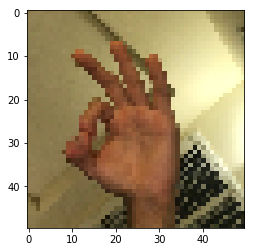

In [24]:
import numpy as np
import matplotlib.pyplot as plt

image2 = image.load_img('ASL-Datasets/arnav_test/predict/f.jpg', target_size=(50, 50))
image2 = image.img_to_array(image2) / 255
image2 = np.expand_dims(image2, axis=0)
plt.imshow(image2[0])
prediction = model.predict(image2)

In [25]:
print("Confidence: " + str(max(prediction[0])))
arg = np.argmax(prediction[0])
alphabet = ['A', 'B', 'C', 'D', 'E', 'F']
alphabet[arg]

Confidence: 0.9992943


'F'